In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("inflacao.csv", sep = ";")

In [3]:
df.index = ['País', 'dezembro 1995', 'dezembro 1996', 'dezembro 1997',
       'dezembro 1998', 'dezembro 1999', 'dezembro 2000', 'dezembro 2001',
       'dezembro 2002', 'dezembro 2003', 'dezembro 2004', 'dezembro 2005',
       'dezembro 2006', 'dezembro 2007', 'dezembro 2008', 'dezembro 2009',
       'dezembro 2010', 'dezembro 2011', 'dezembro 2012', 'dezembro 2013',
       'dezembro 2014', 'dezembro 2015', 'dezembro 2016', 'dezembro 2017',
       'dezembro 2018', 'dezembro 2019', 'dezembro 2020', 'dezembro 2021',
       'Fonte: "IBGE - Índice Nacional de Preços ao Consumidor Amplo"']

In [4]:
df = df.drop('Fonte: "IBGE - Índice Nacional de Preços ao Consumidor Amplo"',axis=0)
df = df.drop('País',axis=0)

In [5]:
data = list(df.index)
for y,x in enumerate(data):
    aux = x.split()
    aux[0] = '12/'
    aux[1] = aux[1][2:]
    data[y] = aux[0]+aux[1]

In [6]:
inflacao = list()
for x in df.values:
    inflacao.append(float(x[0]))

In [7]:
import matplotlib.pyplot as plt


In [8]:
df1 = pd.read_csv("selic.csv", sep=";")

In [9]:
data2 = list(df1["data"])

In [10]:
for y,x in enumerate(data2):
    aux = x.split("/")
    data2[y] = aux[1]+'/'+aux[2]


In [11]:
taxa = list(df1['valor'])
soma = []
resultado = 0
for e,x in enumerate(taxa):
    aux = x.split(",")
    taxa[e] = aux[0]+'.'+aux[1]
datas_taxa = list(zip(data2,taxa))
resultado_lista = []
ano = '1995'



In [12]:
for x in datas_taxa:

    ano1 =x[0][3:]
    num = float(x[1])
    mes = x[0][0:2]
    if ano != ano1:
        for x in soma:
            resultado += x
        resultado_lista.append(['12/'+ano[2:], resultado/len(soma)])
        resultado = 0
        soma.clear()
        ano = ano1
    if mes == '12':
        soma.append(num)

In [13]:
data1 = []
selic = []
for x in resultado_lista:
    data1.append(x[0])
    selic.append(x[1])

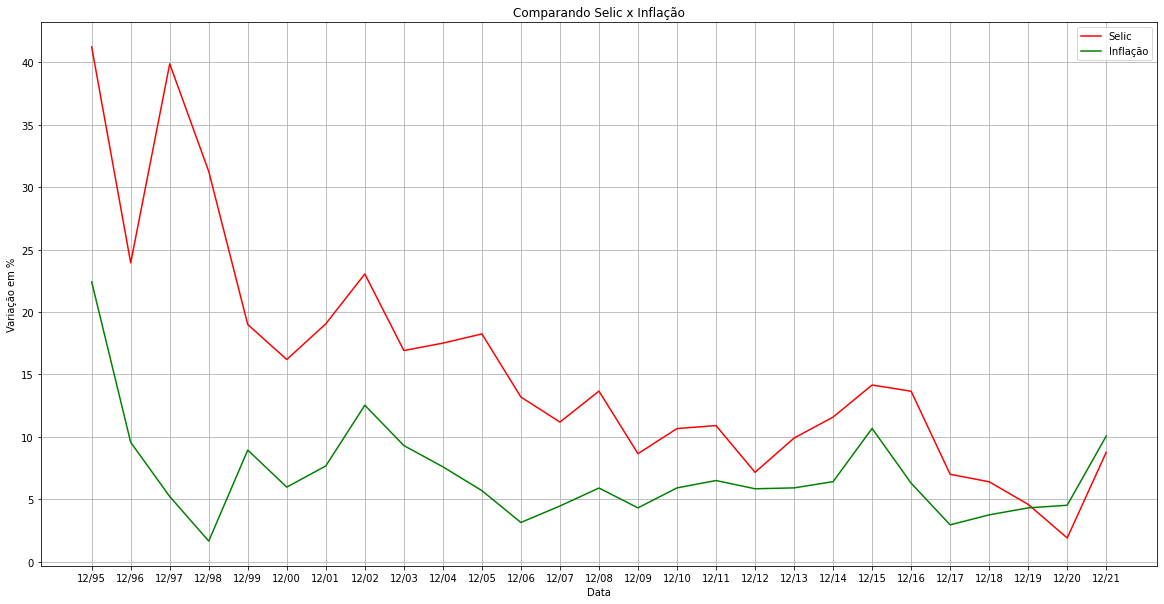

In [15]:
plt.figure(figsize=(20,10))
plt.plot(data1,selic,color='r',label='Selic')
plt.plot(data,inflacao,color='g',label='Inflação')
plt.xlabel("Data")
plt.ylabel("Variação em %")
plt.title("Comparando Selic x Inflação")
plt.grid(True)
plt.legend()
plt.savefig('selic_x_inflacao',format='png')
plt.show()